In [53]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.pylab as pylab
from utils import u_grid, u_interpolate as u_inter
import salem
pylab.rcParams['figure.figsize'] = (400., 150.)
%matplotlib inline

In [7]:
cd ..

/users/global/cornkle/pythonWorkspace/proj_CEH


In [56]:
file = '/prj/vera/semval/hansen_forest_2018_0.05deg/Hansen_GFC_2000-2017-v1.5_treecover_WAfrica_250m_cdomerge_time.nc'

In [59]:
da = xr.open_dataset(file)

In [87]:
da.time

<xarray.DataArray 'time' (time: 18)>
array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009], dtype=int32)
Coordinates:
  * time     (time) int32 1992 1993 1994 1995 1996 ... 2005 2006 2007 2008 2009
Attributes:
    axis:       Z
    long_name:  surface

In [62]:
da = da['treecover'].sel(LON=slice(-8,-5), LAT=slice(6,8))

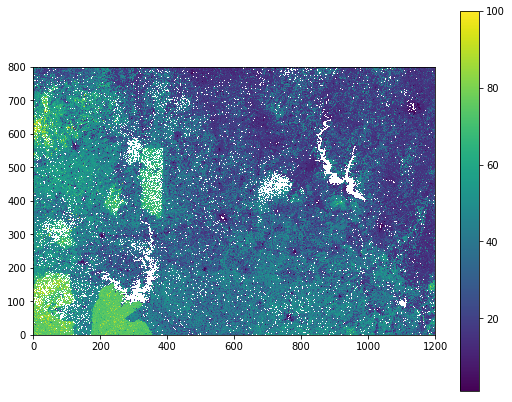

In [65]:
plt.figure(figsize=(9,7))
plt.imshow(da[-1], origin='lower')
plt.colorbar()

In [66]:
da.values[np.isnan(da.values)]=0

In [67]:
grid = u_grid.make(da['LON'].values, da['LAT'].values, 5000)
outt = grid.lookup_transform(da, return_lut=False, method=np.nanmean)

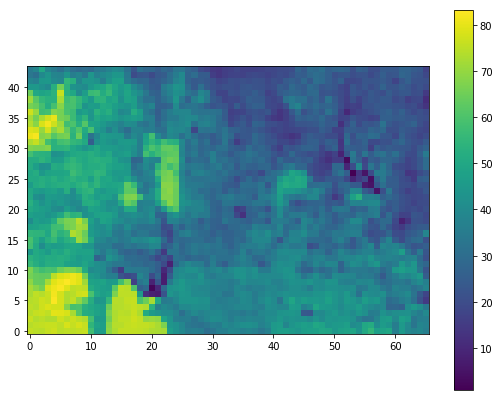

In [68]:
plt.figure(figsize=(9,7))
plt.imshow(outt[0], origin='lower')
plt.colorbar()

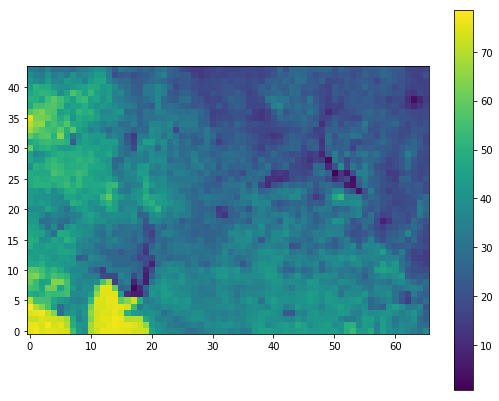

In [69]:
plt.figure(figsize=(9,7))
plt.imshow(outt[-1], origin='lower')
plt.colorbar()

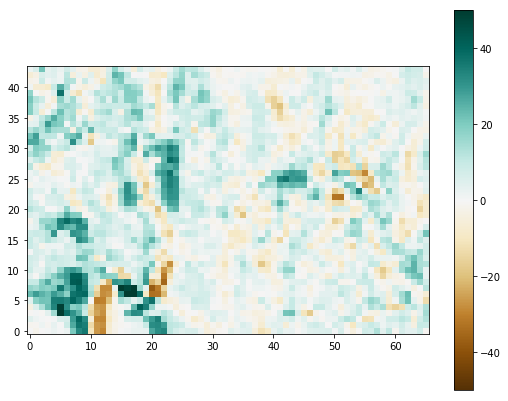

In [82]:
plt.figure(figsize=(9,7))
plt.imshow(outt[0]-outt[-1], origin='lower', cmap='BrBG', vmin=-50, vmax=50)
plt.colorbar()

Text(0, 0.5, 'Longitudes')

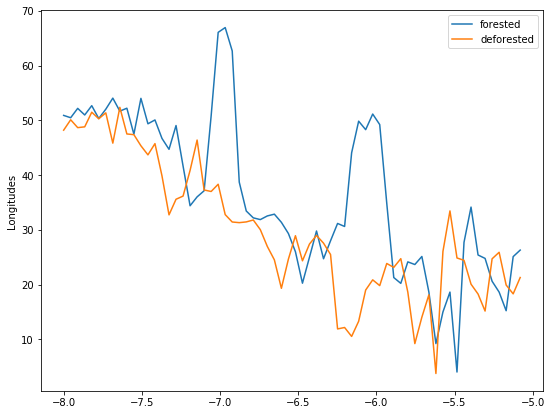

In [91]:
plt.figure(figsize=(9,7))
plt.plot(grid.ll_coordinates[0][0,:],outt[0,25,:], label='forested')   # zonal crossection through deforestation
plt.plot(grid.ll_coordinates[0][0,:],outt[-1,25,:], label='deforested')
plt.legend()
plt.ylabel('Forest cover fraction')
plt.ylabel('Longitudes')